In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('d1.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df=df.drop(columns=['BloodPressure', 'SkinThickness'], axis=1)

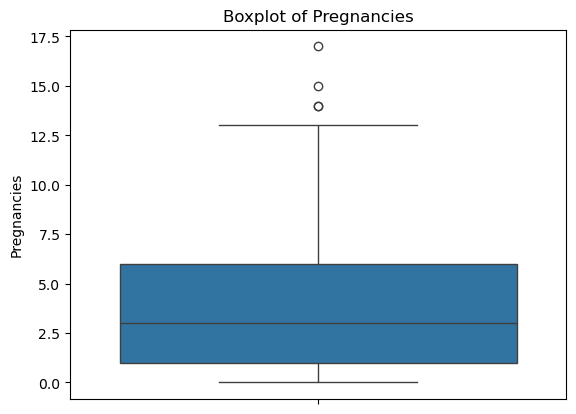

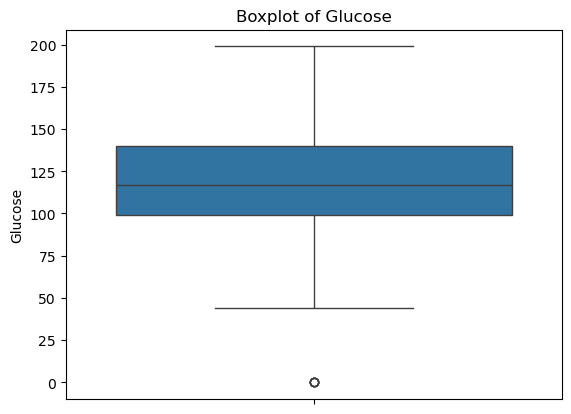

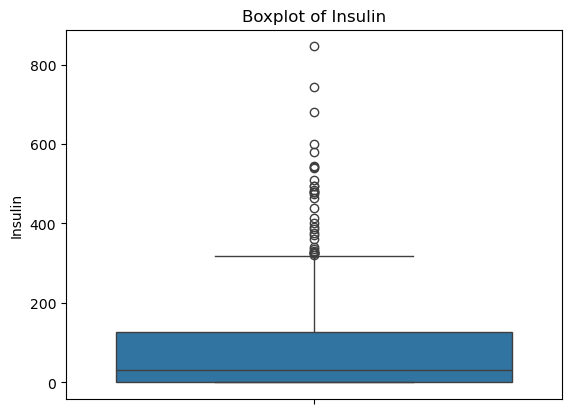

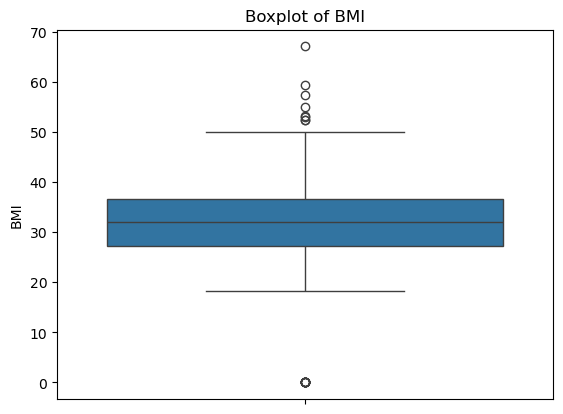

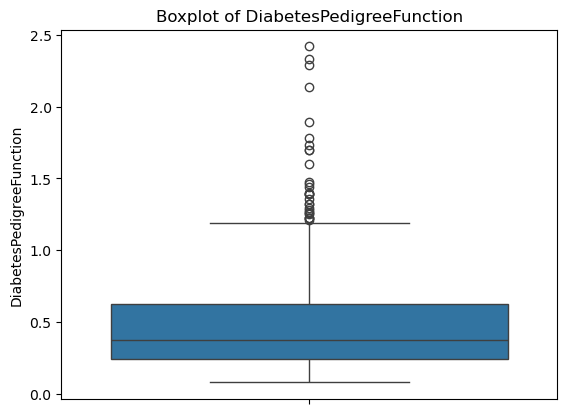

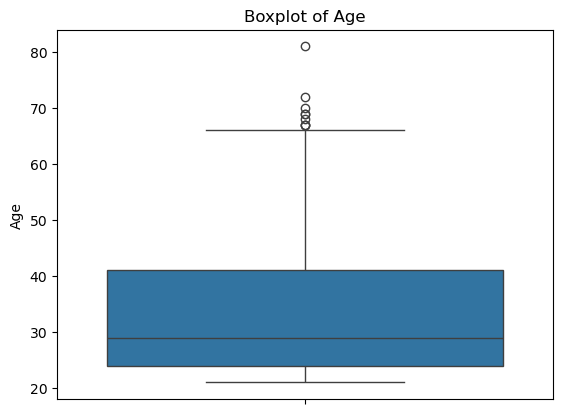

In [9]:
# def outlier_detect():
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col!='Outcome':
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

In [10]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col!='Outcome':
        Q1=df[col].quantile(.25)
        Q3=df[col].quantile(.75)
        IQR=Q3-Q1
        Upper=Q3+1.5*IQR
        Lower=Q1-1.5*IQR
        df[col]=np.where(df[col]>Upper, Upper, df[col])
        df[col]=np.where(df[col]<Lower, Lower, df[col])

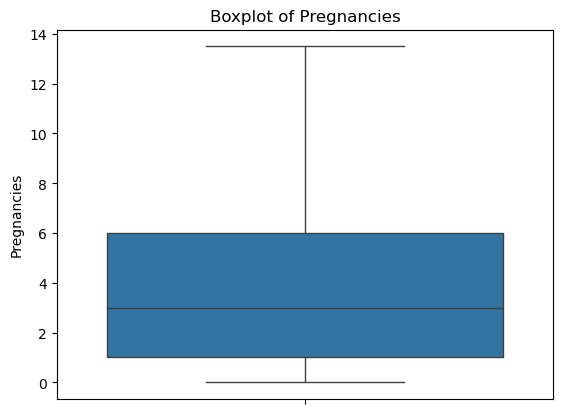

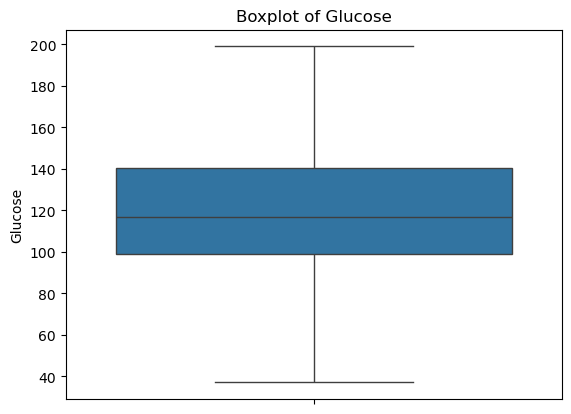

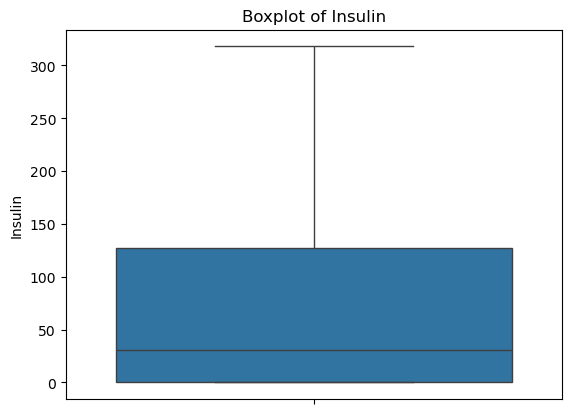

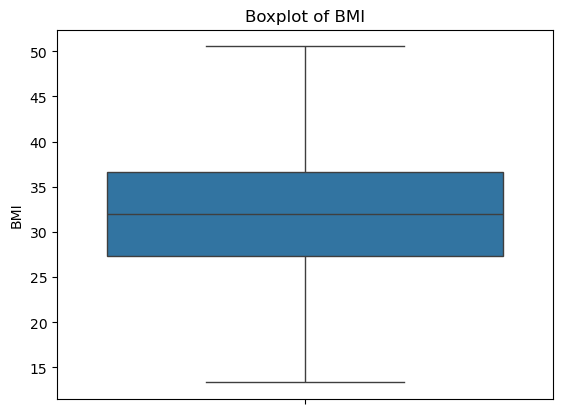

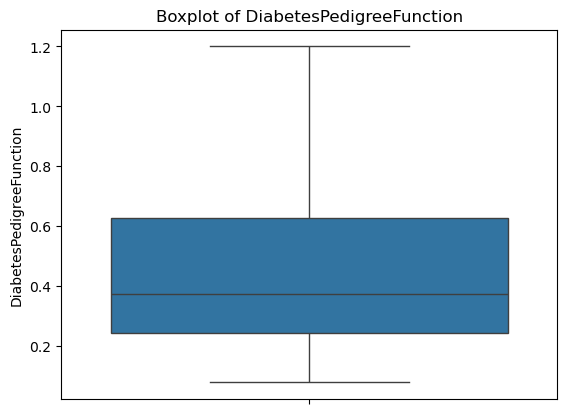

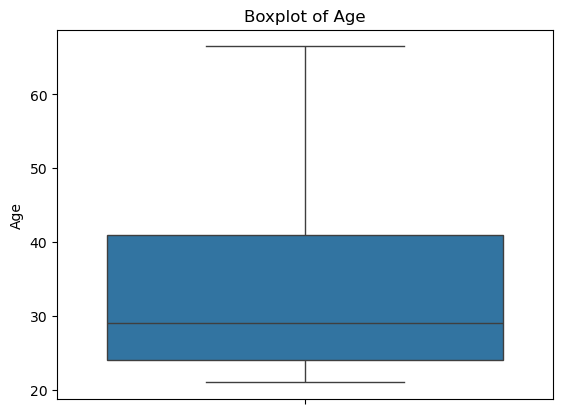

In [11]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col!='Outcome':
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

In [12]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,168.0,43.1,1.200,33.0,1


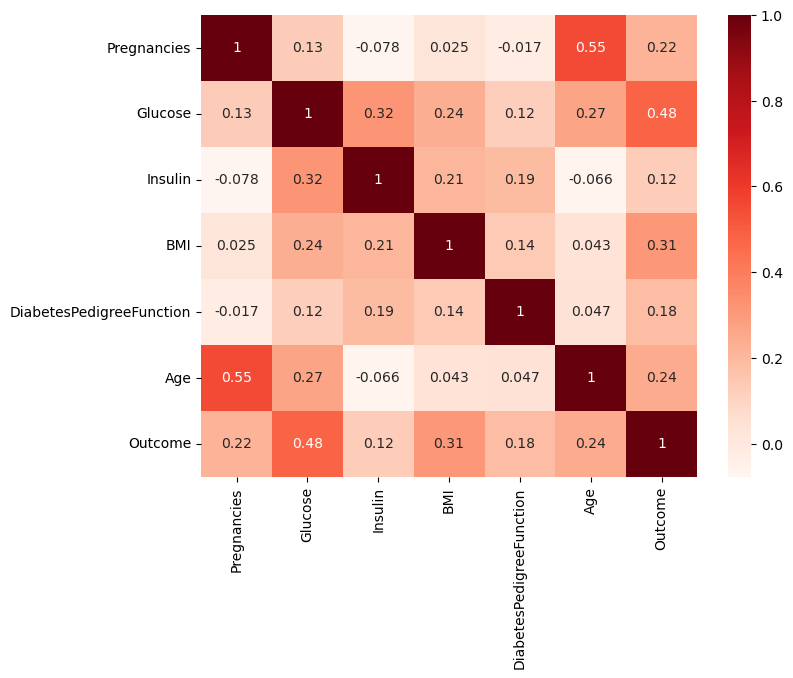

In [13]:
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [15]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [16]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import RandomOverSampler

over=RandomOverSampler()
x,y=over.fit_resample(x,y)

y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=12, stratify=y)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [19]:
rf=RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [20]:
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)

In [21]:
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test))

Testing Accuracy:  0.875


In [22]:
print('Training Accuracy: ', accuracy_score(y_train, y_pred_train))

Training Accuracy:  1.0


In [23]:
print('Confusion Matrix Training: ', confusion_matrix(y_train, y_pred_train))

Confusion Matrix Training:  [[400   0]
 [  0 400]]


In [24]:
print('Confusion Matirx Testing: ', confusion_matrix(y_test, y_pred_test))

Confusion Matirx Testing:  [[84 16]
 [ 9 91]]


In [25]:
print('Classification Report: ', classification_report(y_train, y_pred_train))

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [26]:
print('Classification Report: ', classification_report(y_test, y_pred_test))

Classification Report:                precision    recall  f1-score   support

           0       0.90      0.84      0.87       100
           1       0.85      0.91      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



In [27]:
train_accu=cross_val_score(rf, x_train, y_train, cv=10)
print('Average Training Accuracy: ', train_accu.mean())

Average Training Accuracy:  0.83375


In [28]:
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred_test))

ROC AUC SCORE:  0.875


In [29]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_test)

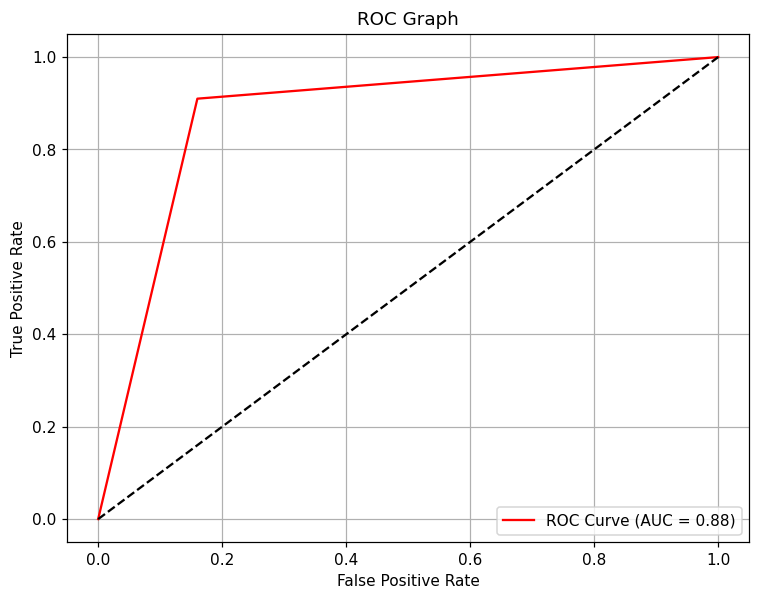

In [30]:
plt.figure(figsize=(8,6), dpi=110)
plt.plot(fpr, tpr, color='red',label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_test)))
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Graph')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [31]:
import pickle

# Save the model
with open("model.pkl", "wb") as f:  # note 'wb' for writing
    pickle.dump(rf, f)


In [36]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(sc, f)  # use your actual variable name
